In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

from qiskit import QuantumRegister, QuantumCircuit
from qiskit import Aer
from qiskit.visualization import plot_state_city
import qiskit.quantum_info as qi

from qelvin import QRegister, QCircuit
import matplotlib.pyplot as plt

In [5]:
def plot_states(psi_param, N):
    states = []
    amps = []
    for i, state in enumerate(psi_param):
        (real, imag) = state
        amp = real*real + imag*imag
        states.append(i)
        amps.append(amp)
        if abs(1.0-amp) < 1e-6:
            print(f"{i:0{N}b}")
            
    plt.plot(states, amps)

# Reversible half-adder

                                                                
                                                                
q0--------o-------------------------------------------o---------
          |                                           |         
          |                                           |         
          |                                           |         
          |                                           |         
q1--------o-------------------------------------------o---------
          |                                           |         
          |                                           |         
      ---------  ---------             ---------  ---------     
     |         ||         |           |         ||         |    
q2---|    X    ||    X    |-----o-----|    X    ||    X    |----
     |         ||         |     |     |         ||         |    
      ---------  ---------      |      ---------  ---------     
                         

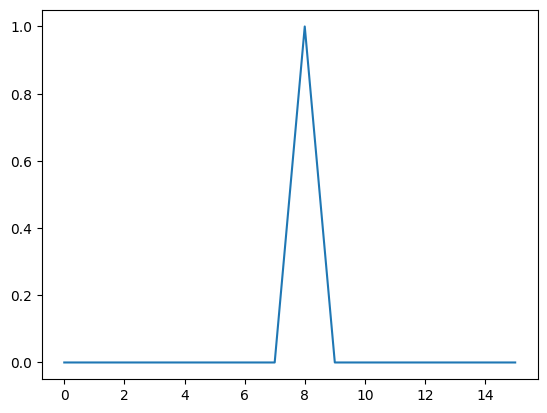

In [6]:
N = 4

psi = QRegister(N, 0b00)
circ = QCircuit(psi)

circ.c2x(0, 1, 2)
circ.x(2)
circ.cx(2, 3)
circ.x(2)
circ.c2x(0, 1, 2)

print(circ)

circ.run()

plot_states(circ.state(), N)

# Quantum Fourier transform adder

In [13]:
N_b = 2
N_fft = 3
N = N_b+N_fft

psi = QRegister(N, 0b10011)
circ = QCircuit(psi)

for j in range(N_b, N):
    for k in range(N_b, j):
        circ.cp(np.pi/float(2**(j-k)), j, k)
    circ.h(j)

print(circ)
circ.run()

for j in range(0, N_b+1):
    for k in range(0, N_b):
        theta = 2.0*np.pi*2**(-(k+1+N_b-j+1-N_b))
        circ.cp(theta, k, N_b+j)

#print(circ)
#circ.run()

for j in reversed(range(N_b, N)):
    circ.h(j)
    for k in reversed(range(N_b, j)):
        circ.cp(-np.pi/float(2**(j-k)), j, k)

#print(circ)
#circ.run()

#for j in reversed(range(0, N_fft)):
#    circ.h(j)
#    for k in reversed(range(0, j)):
#        circ.cp(np.pi/float(2**(j-k)), k, j)
        
#for j in range(0, N_fft):
#    for k in range(0, N_x):
#        if k+N_fft-j+1-N_x <= 0:
#            continue
#        theta = 2.0*np.pi*2**(-(k+N_fft-j+1-N_x))
#        circ.cp(theta, N-k-1, N_fft-j-1)

#for j in range(0, N_fft):
#    for k in range(0, j):
#        circ.cp(np.pi/float(2**(j-k)), k, j)
#    circ.h(j)

psi_out = circ.state()

#plot_states(psi_out, N)



                                                                           
                                                                           
q0-------------------------------------------------------------------------
                                                                           
                                                                           
                                                                           
                                                                           
q1-------------------------------------------------------------------------
                                                                           
                                                                           
      ---------  ---------             ---------                           
     |         ||         |           |         |                          
q2---|    H    ||P(+1.571)|-----------|P(+0.785)|--------------------------
     |      

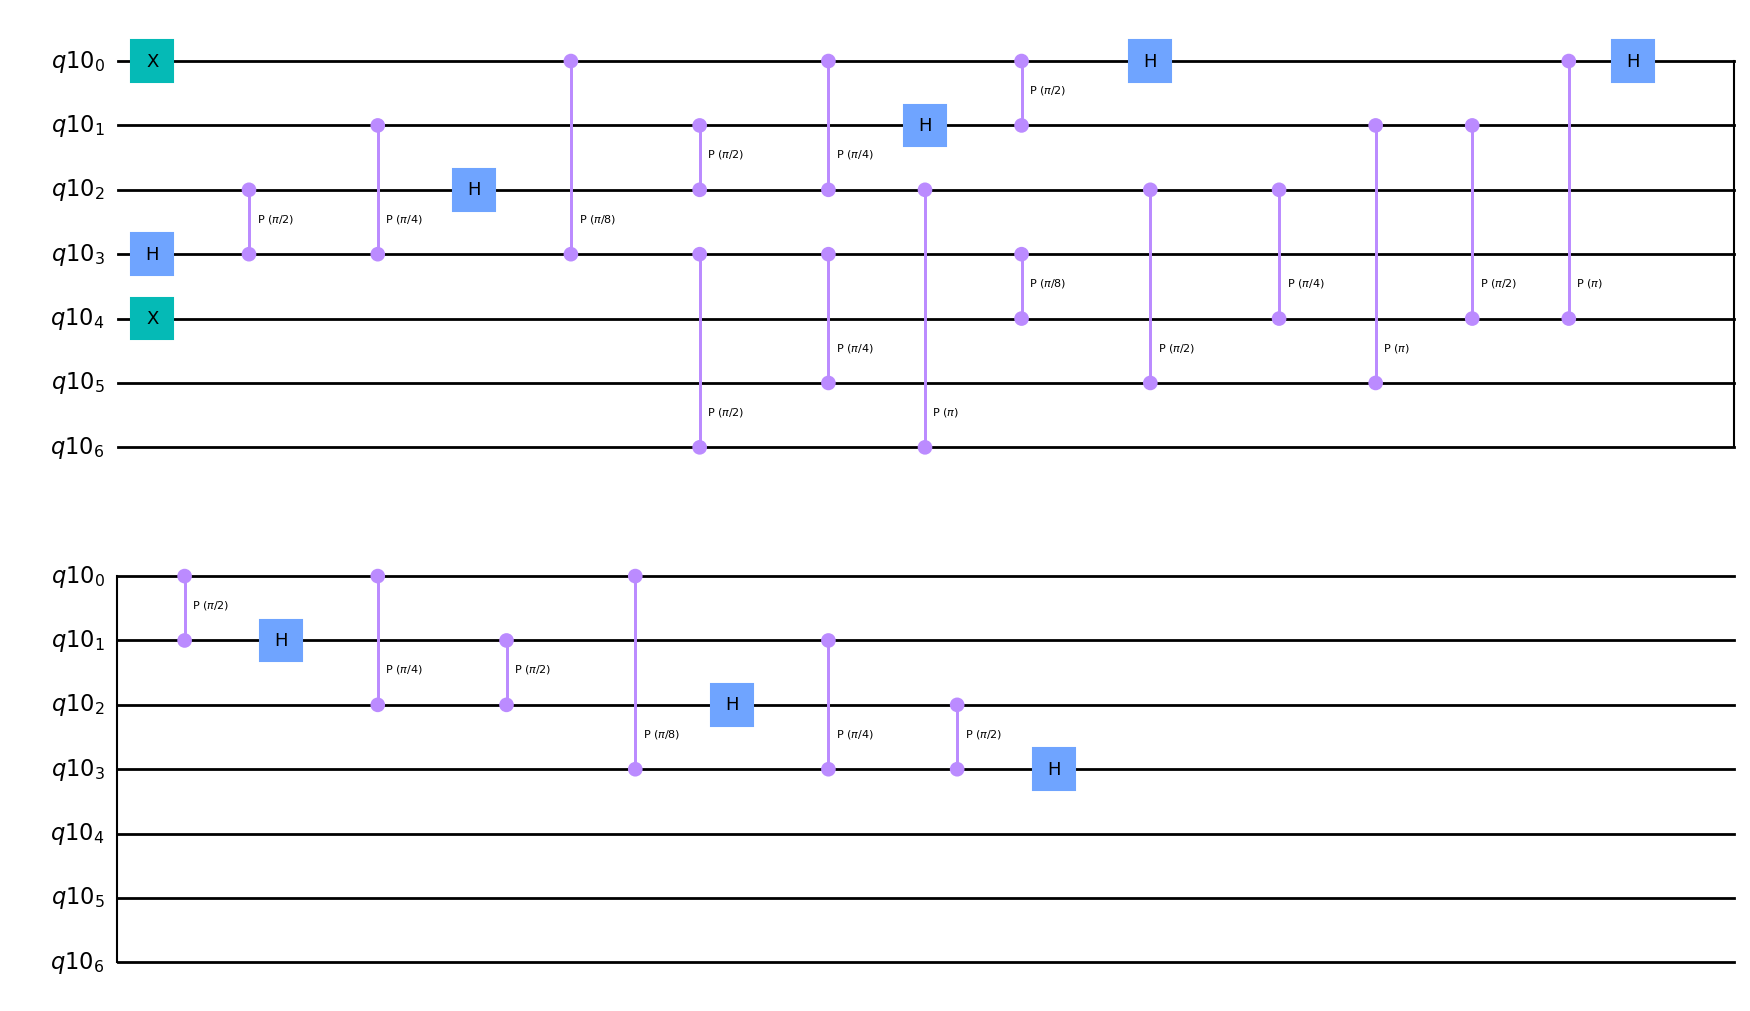

0b11110


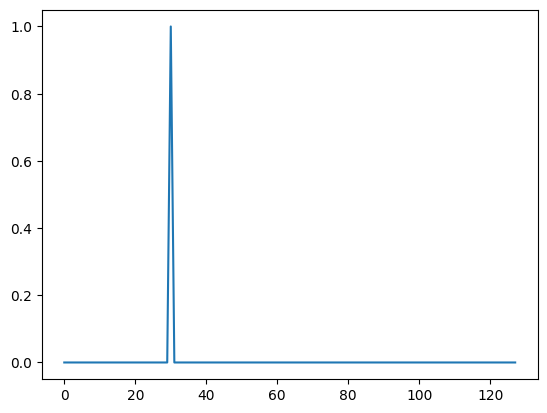

In [17]:
backend = Aer.get_backend('statevector_simulator')

psi = QuantumRegister(N)
circ = QuantumCircuit(psi)

circ.x(psi[0])
circ.x(psi[4])

#print("State before QFT:")
#print(qi.Statevector.from_instruction(circ))

#for j in range(N_x, N):
#    for k in range(N_x, j):
#        circ.cp(np.pi/float(2**(j-k)), psi[j], psi[k])
#    circ.h(psi[j])


#for j in range(N_x, N):
#    for k in range(0, N_x):
#        theta = 2.0*np.pi*2**(-(k+N_x-j+2))
#        circ.cp(theta, psi[k], psi[j])

#for j in reversed(range(N_x, N)):
#    for k in reversed(range(j+1, N)):
#        theta = -2.0*np.pi*2**(-(k-j+1))
#        circ.cp(theta, psi[k], psi[j])
#    circ.h(psi[j])

for j in reversed(range(0, N_fft)):
    circ.h(psi[j])
    for k in reversed(range(0, j)):
        circ.cp(np.pi/float(2**(j-k)), psi[k], psi[j])
        
for j in range(0, N_fft):
    for k in range(0, N_x):
        if k+N_fft-j+1-N_x <= 0:
            continue
        theta = 2.0*np.pi*2**(-(k+N_fft-j+1-N_x))
        circ.cp(theta, psi[N-k-1], psi[N_fft-j-1])

for j in range(0, N_fft):
    for k in range(0, j):
        circ.cp(np.pi/float(2**(j-k)), psi[k], psi[j])
    circ.h(psi[j])

display(circ.draw('mpl'))

job = backend.run(circ)

result = job.result()

outputstate_qiskit = result.get_statevector(circ, decimals=3)

#print("State after QFT:")
#print(outputstate_qiskit)

def plot_states_qiskit(psi_param):
    states = []
    amps = []
    for i, state in enumerate(psi_param):
        amp = np.abs(state)*np.abs(state)
        states.append(i)
        amps.append(amp)
        if amp > 0.01:
            print(bin(i))
    plt.plot(states, amps)

plot_states_qiskit(outputstate_qiskit)

# Quantum Fourier transform multiplier

                                                                                                                       
                                                                                                                       
q0---------------------------------------------------------------------------------------------------------------------
                                                                                                                       
                                                                                                                       
                                                                                                                       
                                                                                                                       
q1-----------------------------------------------------------------------------------------------------------o---------
                                        

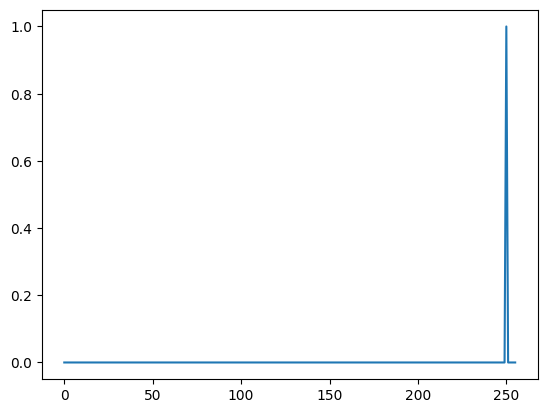

In [106]:
N_x = 2
N_y = 2
N_fft = 2*N_x
N = N_x+N_y+N_fft

psi = QRegister(N, 0b00001010)
circ = QCircuit(psi)

for j in range(N_x+N_y, N):
    for k in range(N_x+N_y, j):
        circ.cp(np.pi/float(2**(j-k)), j, k)
    circ.h(j)
    
for i in reversed(range(0, N_x)):
    for j in reversed(range(0, N_fft)):
        for k in range(0, N_y):
            theta = 2.0*np.pi*2**(-(k+1+i+1+j+1-2*N_y))
            circ.c2p(theta, i, N_x+k, N_x+N_y+N_fft-j-1)

for j in reversed(range(N_x+N_y, N)):
    circ.h(j)
    for k in reversed(range(N_x+N_y, j)):
        circ.cp(np.pi/float(2**(j-k)), j, k)

print(circ)

circ.run()

plot_states(circ.state(), N)